<a href="https://colab.research.google.com/github/MustafaShama98/Cloud-Compute/blob/main/Targil_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# Install the Firebase library
!pip install firebase-admin
# Install required libraries
!pip install python-firebase
!pip install pandas
!pip install matplotlib

In [25]:
import firebase_admin
from firebase_admin import credentials, db
import pandas as pd
import matplotlib.pyplot as plt
import json

# Load Firebase credentials from JSON file
cred_path = '/content/drive/My Drive/Colab Notebooks/creds.json'

# Check if the app is already initialized
if not firebase_admin._apps:
    cred = credentials.Certificate(cred_path)
    firebase_admin.initialize_app(cred)

# Create an index and save it in Firestore
index_data = {
    'Virtualization': 'https://www.vmware.com/il/solutions/virtualization.html',
    'vSphere': 'https://www.vmware.com/il/products/vsphere.html',
    'ESXi': 'https://www.vmware.com/il/products/esxi-and-esx.html',
    'Horizon': 'https://customerconnect.vmware.com/en/downloads/info/slug/desktop_end_user_computing/vmware_horizon_clients/horizon_8',
    'vCenter': 'https://www.vmware.com/il/products/vcenter.html',
    'NSX': 'https://www.vmware.com/il/products/nsx.html',
    'Cloud Computing': 'https://www.vmware.com/content/vmware/vmware-published-sites/us/solutions/cloud-computing.html',
    'Workstation': 'https://www.vmware.com/il/products/workstation-pro.html',
    'Hybrid Cloud': 'https://www.vmware.com/il/cloud-solutions/hybrid-cloud.html',
    'Security': 'https://www.vmware.com/il/security.html'
}

# Reference to the database
ref = db.reference('/vmware_index')

# Set the index data
ref.set(index_data)

print("Index saved to Firestore successfully.")


Index saved to Firestore successfully.


Cloud Computing: 0 occurrences
ESXi: 1 occurrences
Horizon: 0 occurrences
Hybrid Cloud: 0 occurrences
NSX: 1 occurrences
Security: 1 occurrences
Virtualization: 1 occurrences
Workstation: 1 occurrences
vCenter: 1 occurrences
vSphere: 1 occurrences

Updated DataFrame with Occurrences:
              Word  \
0  Cloud Computing   
1             ESXi   
2          Horizon   
3     Hybrid Cloud   
4              NSX   
5         Security   
6   Virtualization   
7      Workstation   
8          vCenter   
9          vSphere   

                                                                                                                    Link  \
0                         https://www.vmware.com/content/vmware/vmware-published-sites/us/solutions/cloud-computing.html   
1                                                                   https://www.vmware.com/il/products/esxi-and-esx.html   
2  https://customerconnect.vmware.com/en/downloads/info/slug/desktop_end_user_computing/vmware_horiz

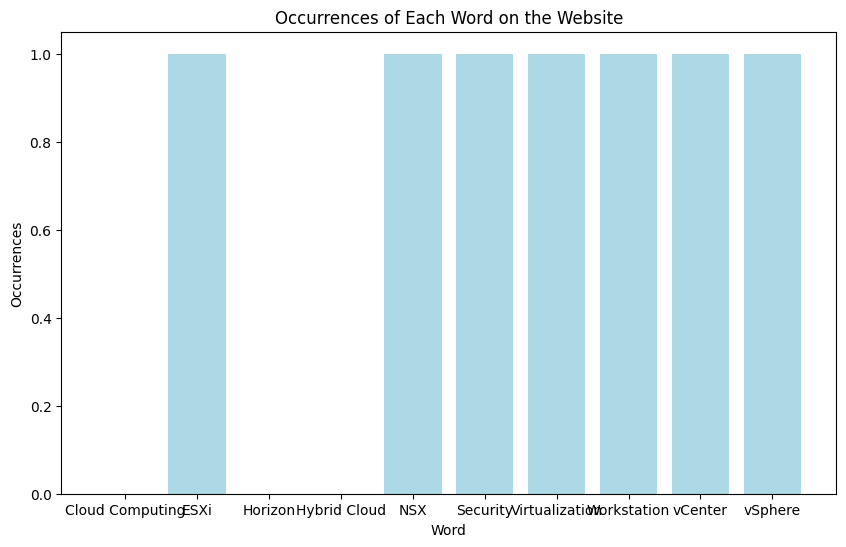

In [31]:
import firebase_admin
from firebase_admin import db, credentials
import pandas as pd
import matplotlib.pyplot as plt
import requests

# Set pandas option to display full link URLs
pd.set_option('display.max_colwidth', None)

# Check if the app is already initialized
if not firebase_admin._apps:
    # Load Firebase credentials from JSON file
    cred_path = '/content/drive/My Drive/Colab Notebooks/creds.json'
    cred = credentials.Certificate(cred_path)
    firebase_admin.initialize_app(cred)

# Reference to the database
ref = db.reference('/vmware_index')

# Retrieve the index data from Firebase
index_data = ref.get()

# Function to count occurrences of a word in the content of a webpage
def count_word_occurrences(word, link):
    try:
        # Fetch the content of the webpage
        response = requests.get(link)
        content = response.text.lower()  # Convert to lowercase for case-insensitive matching

        # Count occurrences of the word
        occurrences = content.count(word.lower())
        return occurrences
    except Exception as e:
        print(f"Error counting occurrences for {word}: {str(e)}")
        return 0

# Count occurrences for each word in index_data
occurrences_dict = {}
for word, link in index_data.items():
    occurrences = count_word_occurrences(word, link)
    occurrences_dict[word] = occurrences

# Create a DataFrame from the index data
df = pd.DataFrame(list(index_data.items()), columns=['Word', 'Link'])

# Display the occurrences for each word
for word, occurrences in occurrences_dict.items():
    print(f"{word}: {occurrences} occurrences")

# Update the DataFrame with the occurrences
df['Occurrences'] = df['Word'].map(occurrences_dict)

# Display the updated DataFrame with full link URLs
print("\nUpdated DataFrame with Occurrences:")
print(df)

# Plot a chart representing the occurrences of each word
plt.figure(figsize=(10, 6))
plt.bar(df['Word'], df['Occurrences'], color='lightblue')
plt.title('Occurrences of Each Word on the Website')
plt.xlabel('Word')
plt.ylabel('Occurrences')
plt.show()
